<a href="https://colab.research.google.com/github/Ketaki124/Movie-rating-prediction/blob/main/Movie_Rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [30]:
df = pd.read_csv('/content/IMDb Movies India.csv',encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [31]:
print("Missing values distribution - ")
print(df.isnull().sum())

Missing values distribution - 
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [32]:
# Drop rows where 'Name' is missing as it might indicate irrelevant data
df.dropna(subset=['Name'], inplace=True)
df.dropna(subset=['Rating'], inplace=True)

In [33]:
# Option 2: If you want to keep rows with missing values for other features, fill them with appropriate values
df['Votes'].fillna(df['Votes'].str.extract('(\d+)').astype(float).mean(), inplace=True) # Example of filling missing 'Votes' with the mean
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)  # Extract numeric part from 'Duration'
df['Duration'].fillna(df['Duration'].mean(), inplace=True)  # Fill missing 'Duration' with the mean

# For categorical columns like Genre, Director, Actor 1, Actor 2, Actor 3, you can fill missing with a placeholder
df.fillna('Unknown', inplace=True)


In [34]:
print("Missing values distribution - ")
print(df.isnull().sum())

Missing values distribution - 
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


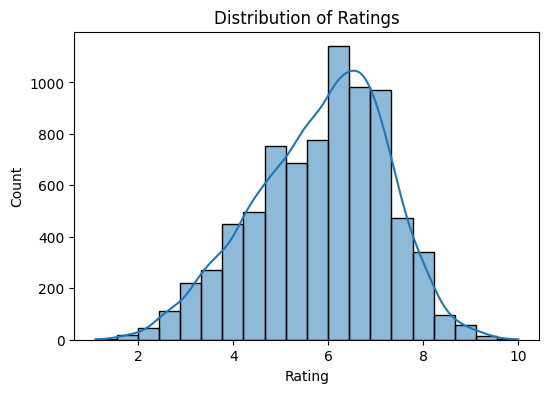

In [35]:
# Plot the distribution of Ratings
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()

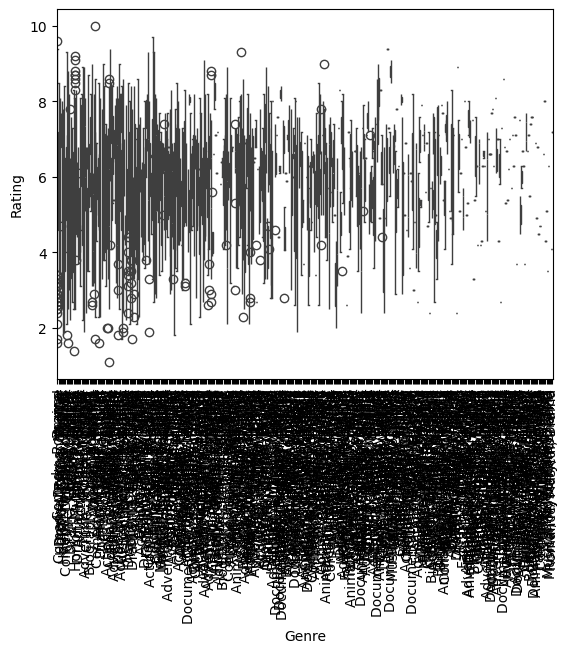

In [21]:
# Boxplot to visualize Rating vs Genre
sns.boxplot(x='Genre', y='Rating', data=df)
plt.xticks(rotation=90)
plt.show()

In [37]:
# Convert categorical features to dummy/indicator variables
df = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['Rating', 'Name'])  # Exclude the target and unnecessary columns
y = df['Rating']


In [38]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Clean the 'Votes' column: extract numeric values and convert to float
X_train['Votes'] = X_train['Votes'].str.extract('(\d+)').astype(float)

# Handle any NaN values in 'Votes' after extraction (you can fill with mean, median, etc.)
X_train['Votes'].fillna(X_train['Votes'].mean(), inplace=True)

# Similarly, clean and convert 'Votes' in X_test
X_test['Votes'] = X_test['Votes'].str.extract('(\d+)').astype(float)
X_test['Votes'].fillna(X_test['Votes'].mean(), inplace=True)

# Now convert 'Duration' to float if needed (it should already be float64)
X_train['Duration'] = X_train['Duration'].astype(float)
X_test['Duration'] = X_test['Duration'].astype(float)

# Normalize numerical features
scaler = StandardScaler()
X_train[['Votes', 'Duration']] = scaler.fit_transform(X_train[['Votes', 'Duration']])
X_test[['Votes', 'Duration']] = scaler.transform(X_test[['Votes', 'Duration']])


In [43]:
# Check unique values in the Year column to see non-numeric entries
print(df['Year'].unique())

# Clean the Year column: extract the year and convert to numeric
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

# Check for any remaining NaN values after extraction
print("NaN values in Year after extraction:", df['Year'].isna().sum())

# Optionally fill NaN values in Year (you can use the mean or any other strategy)
df['Year'].fillna(df['Year'].mean(), inplace=True)

# Now, proceed to split and prepare the features again
X = df.drop(columns=['Rating', 'Name'])  # Ensure you drop 'Year' if not using it
y = df['Rating']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean the 'Votes' column as before
X_train['Votes'] = X_train['Votes'].str.extract('(\d+)').astype(float)
X_train['Votes'].fillna(X_train['Votes'].mean(), inplace=True)

X_test['Votes'] = X_test['Votes'].str.extract('(\d+)').astype(float)
X_test['Votes'].fillna(X_test['Votes'].mean(), inplace=True)

# Ensure 'Duration' is float
X_train['Duration'] = X_train['Duration'].astype(float)
X_test['Duration'] = X_test['Duration'].astype(float)

# Normalize numerical features
scaler = StandardScaler()
X_train[['Votes', 'Duration', 'Year']] = scaler.fit_transform(X_train[['Votes', 'Duration', 'Year']])
X_test[['Votes', 'Duration', 'Year']] = scaler.transform(X_test[['Votes', 'Duration', 'Year']])


['(2019)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)' '(2016)' '(1991)'
 '(2018)' '(2010)' '(1958)' '(2021)' '(2017)' '(2009)' '(1993)' '(2002)'
 '(1946)' '(2008)' '(1994)' '(2007)' '(2013)' '(2003)' '(1998)' '(1979)'
 '(1951)' '(1956)' '(1974)' '(2015)' '(2006)' '(1981)' '(2020)' '(1985)'
 '(2011)' '(1967)' '(1988)' '(1995)' '(1987)' '(1996)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1982)' '(1977)' '(1950)' '(1969)'
 '(1948)' '(1970)' '(1990)' '(1989)' '(1947)' '(2001)' '(2000)' '(1971)'
 '(1978)' '(1944)' '(1963)' '(1935)' '(1992)' '(1976)' '(1984)' '(1975)'
 '(1980)' '(1966)' '(1972)' '(1960)' '(1964)' '(1952)' '(1959)' '(1957)'
 '(1954)' '(1962)' '(1961)' '(1965)' '(1933)' '(1955)' '(1983)' '(1936)'
 '(1940)' '(1932)' '(1949)' '(1945)' '(1938)' '(1941)' '(1942)' '(1937)'
 '(1934)' '(1931)' '(1939)' '(1917)']
NaN values in Year after extraction: 0


In [44]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")

Linear Regression Mean Squared Error: 2.840583473638651e+24
Linear Regression R-squared: -1.5278976404482982e+24


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest Mean Squared Error: 1.2874132891414138
Random Forest R-squared: 0.30752405447136155


In [47]:
# Example: Making predictions on the test set
predictions = rf_model.predict(X_test)

# Display the first few predictions alongside actual ratings
predictions_df = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': predictions})
print(predictions_df.head())


       Actual Ratings  Predicted Ratings
9456              3.3              4.126
14816             5.3              5.631
3213              5.7              5.857
3778              7.2              6.769
5775              3.5              6.415
